## Assignment 24.1
### ACD MDS (Mar 2018 batch) Student: K. Anandaranga

#### Predicting Survival in the Titanic Dataset using DECISION TREE

#### Load libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import pydotplus
import graphviz
 

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import tree, metrics, model_selection, preprocessing

from IPython.display import Image, display


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.externals.six import StringIO



#### Load dataset

In [3]:
url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

titanic = pd.read_csv(url)

In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Note: You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Factorize the dependent variable (i.e. Sex)

In [7]:
titanic['Sex_num'], _ = pd.factorize(titanic['Sex'])


In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [9]:
titanic.shape

(891, 13)

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Sex_num        891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [11]:
titanic_subset = titanic[['Pclass', 'Sex_num', 'Age', 'SibSp', 'Parch','Fare','Survived']]

In [12]:
titanic_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex_num     891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Survived    891 non-null int64
dtypes: float64(2), int64(5)
memory usage: 48.8 KB


In [13]:
titanic_model = titanic_subset.dropna(axis=0)

In [14]:
titanic_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
Pclass      714 non-null int64
Sex_num     714 non-null int64
Age         714 non-null float64
SibSp       714 non-null int64
Parch       714 non-null int64
Fare        714 non-null float64
Survived    714 non-null int64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


#### Chosing model features

In [15]:
y = titanic_model['Survived']
X = titanic_model[['Pclass', 'Sex_num', 'Age', 'SibSp', 'Parch','Fare']]


#### Split data into 70% training and 30% test

In [17]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

#### Train the Decision Tree

In [34]:
dtree = tree.DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

#### Predict with Test dataset

In [35]:
y_pred = dtree.predict(X_test)

#### Model performance

In [36]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))


Misclassified samples: 50
Accuracy: 0.77


In [37]:
sklearn.metrics.confusion_matrix (y_test, y_pred)


array([[100,  25],
       [ 25,  65]])

##### Shows where the misclassifications are (25 on one-side and 25 on other-side)

#### Graphing the tree

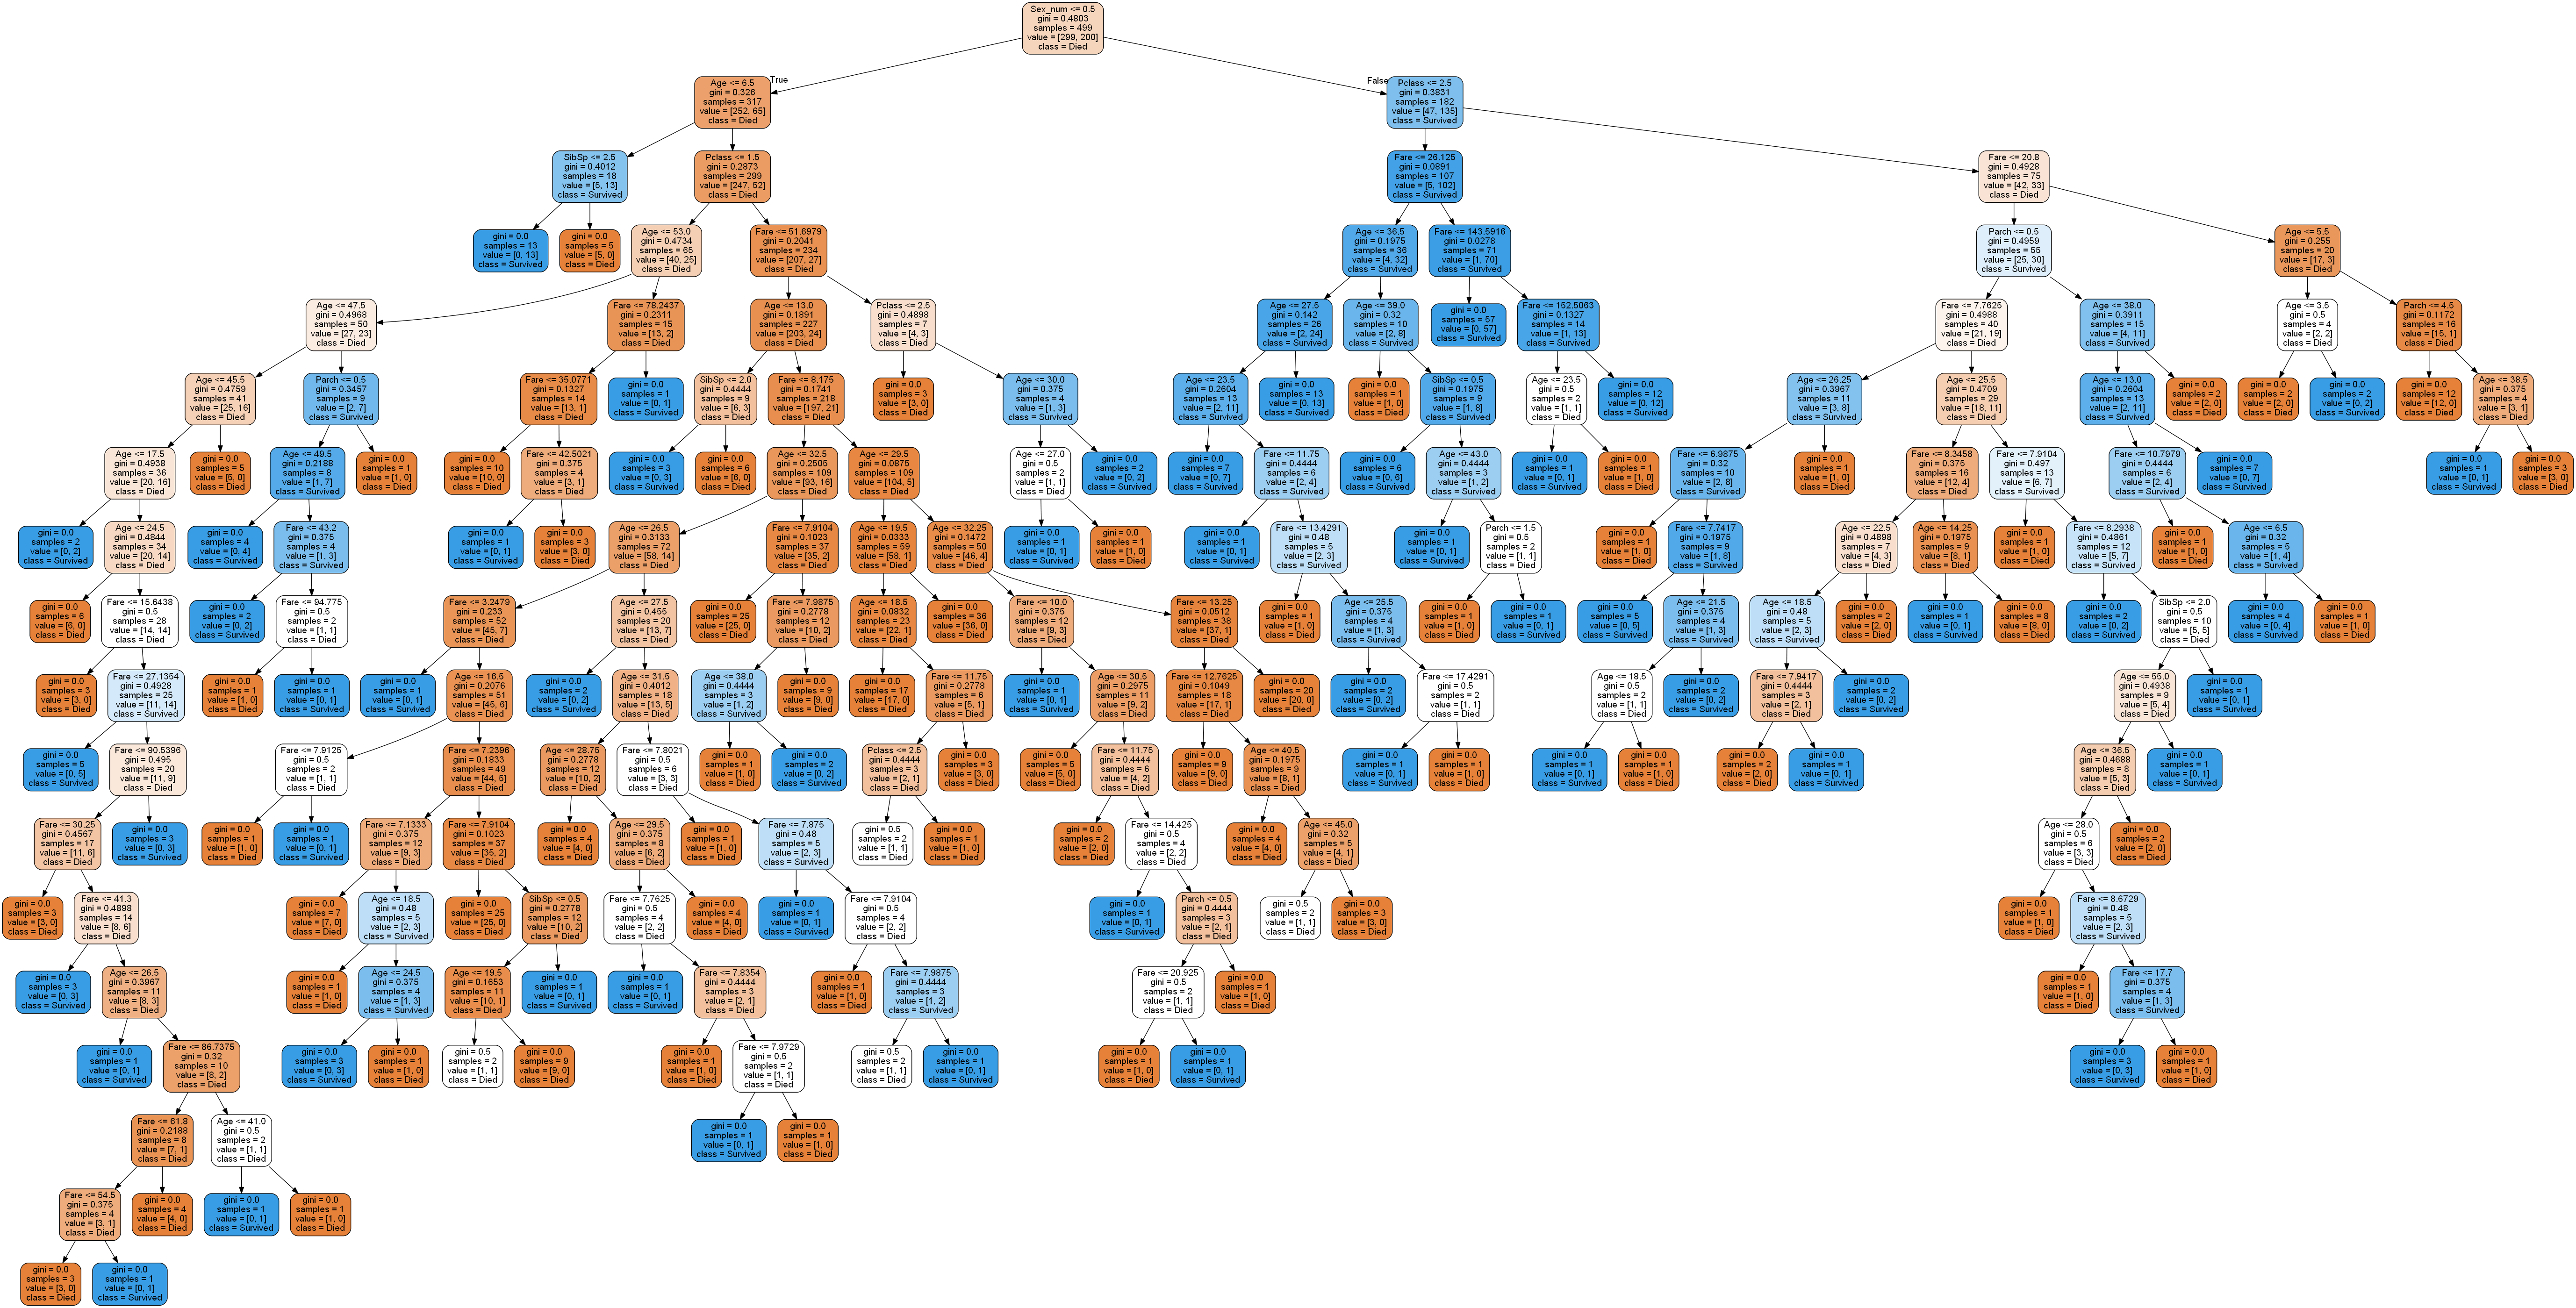

In [38]:
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=['Pclass', 'Sex_num', 'Age', 'SibSp', 'Parch','Fare'],  
                                class_names=['Died', 'Survived']) # Survived = 0 means Died, and 1 means survived
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))


#### To export the graph to a PDF file

In [39]:
out_data = StringIO()
tree.export_graphviz(dtree, out_file=out_data)
graph=pydotplus.graph_from_dot_data(out_data.getvalue())
graph.write_pdf("decision_tree.pdf")


True

#### Cross-validation

In [40]:
scores = cross_val_score(estimator= dtree,     # Model to test
                X= X,  
                y = y,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[ 0.75        0.70833333  0.76388889  0.80555556  0.83098592  0.8028169
  0.8028169   0.69014085  0.83098592  0.84507042]
Average accuracy:  0.783059467919


####         The Decision Tree model is 78% accurate in predicting survival rate

##### Model tuning : Attempt 1

Misclassified samples: 47
Accuracy: 0.78


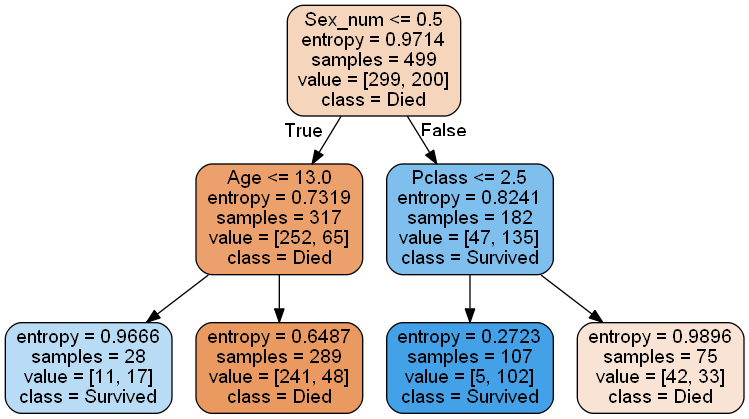

Accuracy per fold: 
[ 0.72222222  0.73611111  0.73611111  0.86111111  0.8028169   0.83098592
  0.8028169   0.73239437  0.81690141  0.78873239]
Average accuracy:  0.783020344288


In [42]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

# Model performance metrics
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
sklearn.metrics.confusion_matrix (y_test, y_pred)

# Graphing the tree
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=['Pclass', 'Sex_num', 'Age', 'SibSp', 'Parch','Fare'],  
                                class_names=['Died', 'Survived']) # Survived = 0 means Died, and 1 means survived
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))
# Cross validation
scores = cross_val_score(estimator= dtree,     # Model to test
                X= X,  
                y = y,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

##### Model tuning - attempt #2

Misclassified samples: 41
Accuracy: 0.81


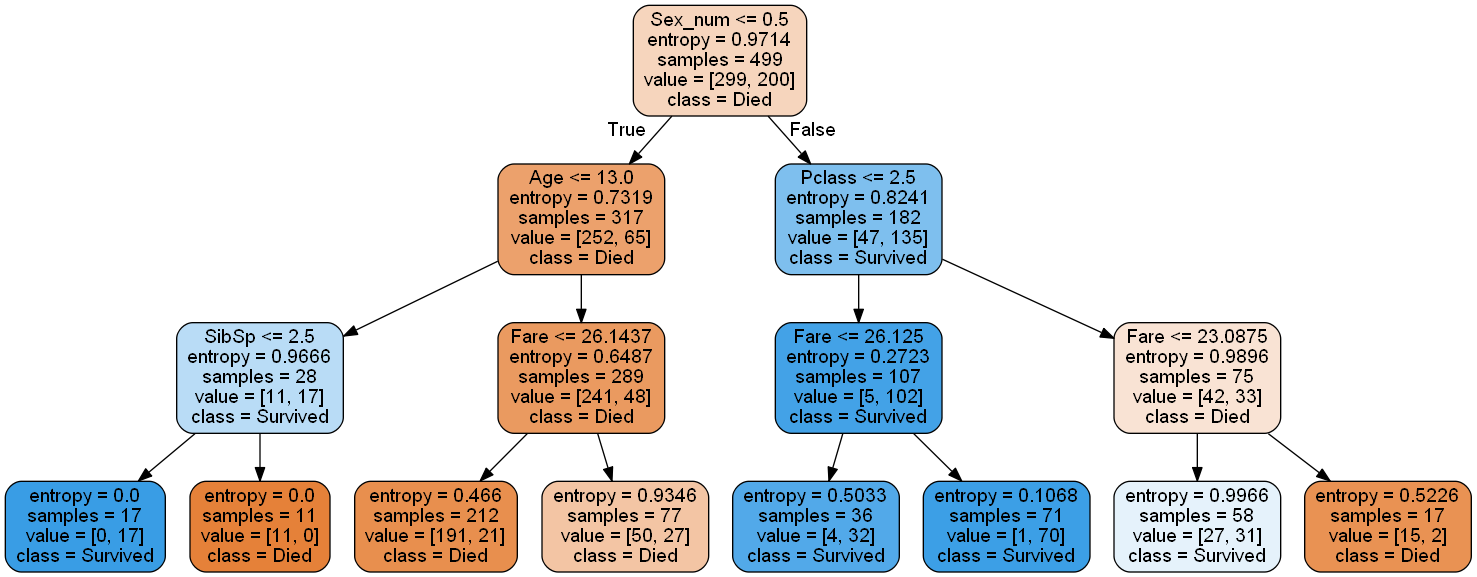

Accuracy per fold: 
[ 0.83333333  0.75        0.80555556  0.76388889  0.77464789  0.78873239
  0.8028169   0.74647887  0.84507042  0.8028169 ]
Average accuracy:  0.791334115806


In [43]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

# Model performance metrics
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
sklearn.metrics.confusion_matrix (y_test, y_pred)

# Graphing the tree
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=['Pclass', 'Sex_num', 'Age', 'SibSp', 'Parch','Fare'],  
                                class_names=['Died', 'Survived']) # Survived = 0 means Died, and 1 means survived
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))
# Cross validation
scores = cross_val_score(estimator= dtree,     # Model to test
                X= X,  
                y = y,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

#### We may settle down with Decision Tree with max_depth = 3 which gives ~ 80% accuracy